In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from config import weather_api_keys
from datetime import datetime

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(-90.000, 90.000, 1500)
lngs = np.random.uniform(-180.000, 180.000, 1500)
lats_lngs = zip(lats,lngs)

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lats_lngs)

In [5]:
# Create a list for holding the cities.
cities = []
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0],coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
print(f'The number of cities found: {len(cities)}.')
    

The number of cities found: 617.


In [6]:
# Create an empty list to hold the weather data.
url = "https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_keys
city_data =[]
# Print the beginning of the logging.
print("Beginning Data Retrieval     \n")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):
    #Group cities in sets of 50 for loggin purposes.
    if (i%50==0 and i>=50):
        set_count+=1
        record_count =1
# Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(' ','+')
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    try:
         # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    # If an error is experienced, skip the city.
    except:
        print(f'{city} not found. Skipping...')
        pass
        
# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    

Beginning Data Retrieval     

-----------------------------
Processing Record 1 of Set 1 | warqla
warqla not found. Skipping...
Processing Record 2 of Set 1 | valdivia
Processing Record 3 of Set 1 | busselton
Processing Record 4 of Set 1 | hithadhoo
Processing Record 5 of Set 1 | east london
Processing Record 6 of Set 1 | mendahara
mendahara not found. Skipping...
Processing Record 7 of Set 1 | thunder bay
Processing Record 8 of Set 1 | punta arenas
Processing Record 9 of Set 1 | ponta do sol
Processing Record 10 of Set 1 | rawson
Processing Record 11 of Set 1 | dingle
Processing Record 12 of Set 1 | new norfolk
Processing Record 13 of Set 1 | montepuez
Processing Record 14 of Set 1 | bredasdorp
Processing Record 15 of Set 1 | belushya guba
belushya guba not found. Skipping...
Processing Record 16 of Set 1 | ati
Processing Record 17 of Set 1 | bluff
Processing Record 18 of Set 1 | iqaluit
Processing Record 19 of Set 1 | kapaa
Processing Record 20 of Set 1 | rikitea
Processing Record 2

In [7]:
len(city_data)

556

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Valdivia,-39.81,-73.25,46.40,100,90,2.24,CL,2020-09-28 02:58:01
1,Busselton,-33.65,115.33,62.01,77,69,1.99,AU,2020-09-28 03:01:54
2,Hithadhoo,-0.60,73.08,83.05,67,100,5.57,MV,2020-09-28 03:01:54
3,East London,-33.02,27.91,54.00,65,1,4.43,ZA,2020-09-28 03:01:55
4,Thunder Bay,48.40,-89.32,54.00,87,75,6.93,CA,2020-09-28 03:00:49
5,Punta Arenas,-53.15,-70.92,46.00,70,40,31.09,CL,2020-09-28 03:01:56
6,Ponta Do Sol,32.67,-17.10,71.60,64,40,9.17,PT,2020-09-28 03:01:56
7,Rawson,-43.30,-65.10,51.80,46,0,11.83,AR,2020-09-28 03:01:57
8,Dingle,11.00,122.67,86.76,69,27,4.68,PH,2020-09-28 03:01:57
9,New Norfolk,-42.78,147.06,57.20,58,40,13.87,AU,2020-09-28 03:01:58


In [9]:
new_column_order = ['City','Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df =city_data_df[new_column_order]

In [10]:
# Create the output file (CSV).
output_data_file = 'weather_data/cities.csv'
city_data_df.to_csv(output_data_file, index_label ='City_ID')

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

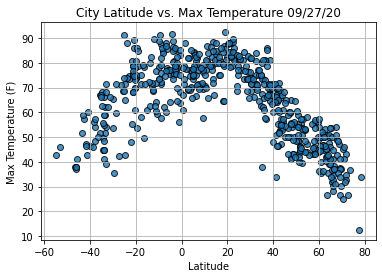

In [17]:
# Get today's data
import time
today=time.strftime('%x')
#Build Scatter plots for latitude vs. max temperature.
fig, ax = plt.subplots()
ax.scatter(lats, max_temps, 
          edgecolor='black', linewidth =1, marker='o',
          alpha=0.8, label='Cities')
# Incorporate the other graph properties.
ax.set_title(f'City Latitude vs. Max Temperature '+today)
ax.set_ylabel('Max Temperature (F)')
ax.set_xlabel('Latitude')
ax.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

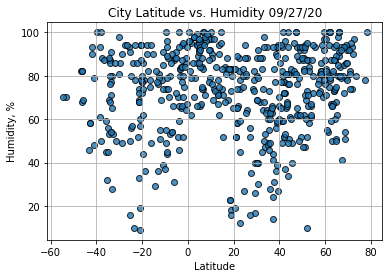

In [19]:
#Build Scatter plots for latitude vs. humidity.
fig, ax = plt.subplots()
ax.scatter(lats, humidity, 
          edgecolor='black', linewidth =1, marker='o',
          alpha=0.8, label='Cities')
# Incorporate the other graph properties.
ax.set_title(f'City Latitude vs. Humidity '+today)
ax.set_ylabel('Humidity, %')
ax.set_xlabel('Latitude')
ax.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

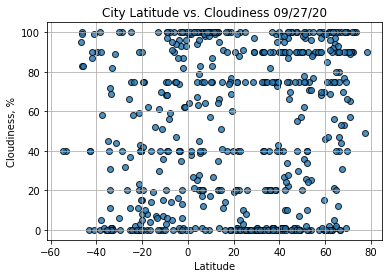

In [20]:
#Build Scatter plots for latitude vs. Cloudiness.
fig, ax = plt.subplots()
ax.scatter(lats, cloudiness, 
          edgecolor='black', linewidth =1, marker='o',
          alpha=0.8, label='Cities')
# Incorporate the other graph properties.
ax.set_title(f'City Latitude vs. Cloudiness '+today)
ax.set_ylabel('Cloudiness, %')
ax.set_xlabel('Latitude')
ax.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

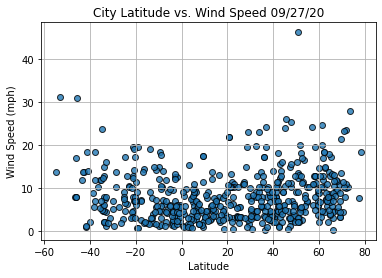

In [21]:
#Build Scatter plots for latitude vs. wind speed.
fig, ax = plt.subplots()
ax.scatter(lats, wind_speed, 
          edgecolor='black', linewidth =1, marker='o',
          alpha=0.8, label='Cities')
# Incorporate the other graph properties.
ax.set_title(f'City Latitude vs. Wind Speed '+today)
ax.set_ylabel('Wind Speed (mph)')
ax.set_xlabel('Latitude')
ax.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()